In [2]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv

In [ ]:
# Nick

In [ ]:
# Nick

In [ ]:
# Nick

In [ ]:
# Nick

In [ ]:
# Nick

In [ ]:
# David

In [ ]:
# David

In [ ]:
# David

In [ ]:
# David

In [ ]:
# David

In [22]:
# Milena
kaggle_dataset_path = '../consolidated_coin_data.csv'
coin_df = pd.read_csv(kaggle_dataset_path)

In [23]:
# Milena
coin_df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


In [24]:
coin_df.shape

(28944, 8)

In [25]:
# Milena
coin_df['Currency'].unique()

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

In [26]:
# Milena
bitcoin_df = coin_df.loc[coin_df['Currency'] == 'bitcoin', :].copy()
bitcoin_df = bitcoin_df.set_index("Date")
bitcoin_df.head()

,Currency,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
"Dec 04, 2019",bitcoin,"7,320.13","7,539.78","7,170.92","7,252.03","21,664,240,918","131,143,073,943"
"Dec 03, 2019",bitcoin,"7,323.98","7,418.86","7,229.36","7,320.15","14,797,485,769","132,359,942,301"
"Dec 02, 2019",bitcoin,"7,424.04","7,474.82","7,233.40","7,321.99","17,082,040,706","132,378,982,377"
"Dec 01, 2019",bitcoin,"7,571.62","7,571.62","7,291.34","7,424.29","18,720,708,479","134,215,145,410"
"Nov 30, 2019",bitcoin,"7,764.06","7,836.10","7,515.85","7,569.63","17,158,194,786","136,829,391,049"


In [27]:
# Milena
#bitcoin_df['Close'] = pd.to_numeric(bitcoin_df['Close'])

bitcoin_df['Close'] = bitcoin_df['Close'].str.replace(',','')
bitcoin_df.head()

,Currency,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
"Dec 04, 2019",bitcoin,"7,320.13","7,539.78","7,170.92",7252.03,"21,664,240,918","131,143,073,943"
"Dec 03, 2019",bitcoin,"7,323.98","7,418.86","7,229.36",7320.15,"14,797,485,769","132,359,942,301"
"Dec 02, 2019",bitcoin,"7,424.04","7,474.82","7,233.40",7321.99,"17,082,040,706","132,378,982,377"
"Dec 01, 2019",bitcoin,"7,571.62","7,571.62","7,291.34",7424.29,"18,720,708,479","134,215,145,410"
"Nov 30, 2019",bitcoin,"7,764.06","7,836.10","7,515.85",7569.63,"17,158,194,786","136,829,391,049"


In [28]:
bitcoin_df["Close"] = bitcoin_df.Close.astype(float)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2412 entries, Dec 04, 2019 to Apr 28, 2013
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    2412 non-null   object 
 1   Open        2412 non-null   object 
 2   High        2412 non-null   object 
 3   Low         2412 non-null   object 
 4   Close       2412 non-null   float64
 5   Volume      2412 non-null   object 
 6   Market Cap  2412 non-null   object 
dtypes: float64(1), object(6)
memory usage: 150.8+ KB


In [41]:
bitcoin_df["Close moving mean"] = bitcoin_df.Close.rolling(30).mean()

In [42]:
bitcoin_df.head()

,Currency,Open,High,Low,Close,Volume,Market Cap,Close moving mean
Date,,,,,,,,
"Dec 04, 2019",bitcoin,"7,320.13","7,539.78","7,170.92",7252.03,"21,664,240,918","131,143,073,943",NaN
"Dec 03, 2019",bitcoin,"7,323.98","7,418.86","7,229.36",7320.15,"14,797,485,769","132,359,942,301",NaN
"Dec 02, 2019",bitcoin,"7,424.04","7,474.82","7,233.40",7321.99,"17,082,040,706","132,378,982,377",NaN
"Dec 01, 2019",bitcoin,"7,571.62","7,571.62","7,291.34",7424.29,"18,720,708,479","134,215,145,410",NaN
"Nov 30, 2019",bitcoin,"7,764.06","7,836.10","7,515.85",7569.63,"17,158,194,786","136,829,391,049",NaN


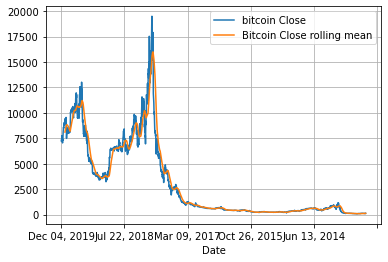

In [46]:
bitcoin_df.Close.plot(label="bitcoin Close")

bitcoin_df.loc[:, "Close moving mean"].plot(grid=True, label="Bitcoin Close rolling mean")

plt.legend()
plt.show()
